Alec Daniel Jurado Luna 1734696          
Cristian Alejandro Luna Pineda 1819020         
Diego Alejandro Montoya Ortega 1748924         
Brandon Gerardo Coria Peña 1911618      
Miguel Angel Solis Corpus 1908279       
Ivan Patricio Lomas Castillo 1847798      
Rodolfo Atilano Santos 1856728



In [15]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
clas_names = ["0", "1", "2", "3", "4",
              "5", "6", "7", "8", "9"]

In [4]:
x_train = x_train / 255.
x_test = x_test / 255.

In [5]:
x_train.shape

(60000, 28, 28)

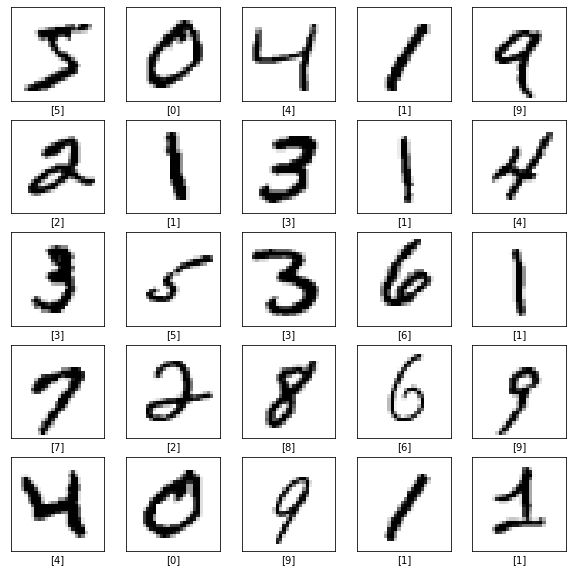

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2593 - accuracy: 0.9268 - val_loss: 0.1360 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1135 - accuracy: 0.9667 - val_loss: 0.0957 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0786 - accuracy: 0.9770 - val_loss: 0.0834 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0750 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0785 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0764 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0737 - val_accuracy:

313/313 - 1s - loss: 0.0832 - accuracy: 0.9778 - 821ms/epoch - 3ms/step


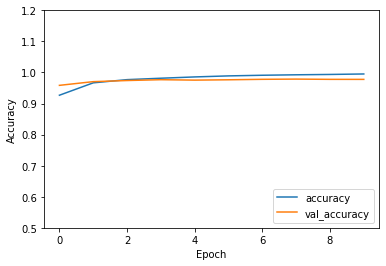

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0832 - accuracy: 0.9778 - 498ms/epoch - 2ms/step

Test accuracy: 0.9778000116348267


In [31]:
imagenes_full=[]
etiquetas_full =[]
num = 0

In [58]:
for m in "Mecatronic":
  path = glob.glob("/content/num2/" + str(num) + "/*.jpeg")
  for n in path:
    test_image = cv2.imread(n, cv2.IMREAD_GRAYSCALE)
  
    # Formato de imagen
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    #Guardar imagenes
    imagenes_full.append(img_resized)
    etiquetas_full.append(num)
  num +=1

In [62]:
len(imagenes_full)

10

In [63]:
len(etiquetas_full)

10

In [64]:
y = np.array(etiquetas_full)
X = np.array(imagenes_full, dtype=np.uint8)

In [69]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.9)

In [70]:
test_X.shape

(9, 28, 28)

In [71]:
predictions = model.predict(test_X)

1/1 [==============================] - 0s 17ms/step


# Prediccion 1


In [72]:
predictions[0]

array([0.        , 0.18664342, 0.        , 0.        , 0.8133565 ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [73]:
np.argmax(predictions[0])

4

In [75]:
test_Y[0]

1

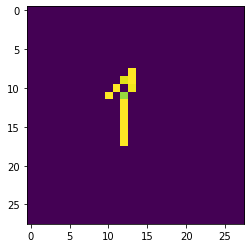

In [82]:
plt.imshow(test_X[0])

# Prediccion 2

In [76]:
predictions[-1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [78]:
np.argmax(predictions[-1])

7

In [80]:
test_Y[-1]

5

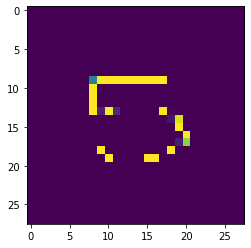

In [84]:
plt.imshow(test_X[-1])

# Prediccion 3

In [85]:
predictions[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [86]:
np.argmax(predictions[5])

9

In [88]:
test_Y[5]

4

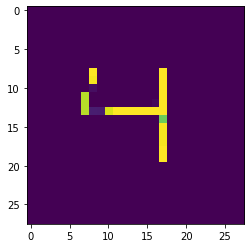

In [89]:
plt.imshow(test_X[5])